In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("LLM_vordlus2.csv")

In [9]:
data

,Nimi,Korpus,NER,Keel,Parameetreid
0,EstBERT,1.154000e+09,90.11,Eesti,340000000
1,FinBERT,1.350000e+10,92.40,Soome,340000000
2,BERT,3.300000e+09,92.80,Inglise,340000000
3,XLM-RoBERTa,5.160000e+11,89.10,Eesti,550000000
4,XLM-RoBERTa,5.160000e+11,92.92,Inglise,550000000
5,mBERT,1.000000e+10,88.37,Eesti,340000000
6,RoBERTa,3.300000e+10,93.40,Inglise,354000000
7,DeBERTa,1.600000e+10,93.80,Inglise,345000000
8,mBERT,1.000000e+10,90.29,Soome,340000000


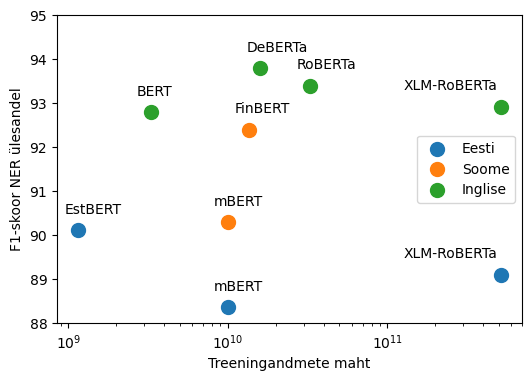

In [11]:
data2 = data[~data.NER.isna()].reset_index(drop = True)
plt.figure(figsize=(6,4))

for keel in data2.Keel.unique():
    data_keel = data[data.Keel == keel]
    scatter = plt.scatter(data_keel.Korpus,data_keel.NER,s=100, label = keel)


for i, txt in enumerate(data2.Nimi):
    if txt == "XLM-RoBERTa":
        plt.annotate(txt, (data2.Korpus[i], data2.NER[i]), textcoords='offset points', xytext = (-70,12))
    else: 
        plt.annotate(txt, (data2.Korpus[i], data2.NER[i]), textcoords='offset points', xytext = (-10,12))


plt.xlabel("Treeningandmete maht")
plt.ylabel("F1-skoor NER ülesandel")
plt.xscale('log')
plt.ylim(88, 95)

plt.legend(loc = 'right')

#plt.savefig('LLM_mudelid.JPG')
plt.show()